# Jones_vector class

Jones_Vector is a class that manages Jones vectors. It allows the user to create and manipulate them.

## Creating an instance

An instance must be created before starting to operate with the Jones vector. The initialization accepts one argument: the name of the vector. This name will be used for printing:

In [2]:
from py_pol.jones_vector import Jones_vector, create_Jones_vectors
from py_pol.stokes import Stokes
from py_pol.utils import degrees
import numpy as np

In [3]:
E = Jones_vector("Source 1")
print(E)

Source 1 = 
[+0.000]   
[+0.000]   



Several Jones_vector objects can be created at the same time using the function *create_Jones_vectors*.

In [4]:
E1, E2 = create_Jones_vectors(name=('Source 2', 'Source 3'))
print(E1, E2)

list_of_E = create_Jones_vectors(N=3)
print(list_of_E)

Source 2 = 
[+0.000]   
[+0.000]   
 Source 3 = 
[+0.000]   
[+0.000]   

[E = 
[+0.000]   
[+0.000]   
, E = 
[+0.000]   
[+0.000]   
, E = 
[+0.000]   
[+0.000]   
]


## Jones_vector class fields

Jones_vector class objects have some fields where some methods and information  stored:

* **M**: 2xN array containing all the Jones vectors.
* **name**: Name of the object for print purposes.
* **size**: Number of stored Jones vectors.
* **shape**: Shape desired for the outputs.
* **ndim**: Number of dimensions for representation purposes.
* **type**: Type of the object ('Jones_vector'). This is used for determining the object class as using isinstance may throw unexpected results in .ipynb files.
* **parameters**: Object of class *Parameters_Jones_vector*.
* **checks**: Object of class *Checks_Jones_vector*.

In [5]:
E = Jones_vector("Source 1")
amp = np.random.rand(3,3)
E.linear_light(azimuth = 0, amplitude=amp)

print('Array: ', E.M)
print('Name: ', E.name)
print('Size: ', E.size)
print('Shape: ', E.shape)
print('Number of dimensions: ', E.ndim)
print('Type: ', E._type, '\n')

print('Parameters (intensity): \n', E.parameters.intensity(), '\n')
print('Checks (circularly polarized): \n', E.checks.is_circular(), '\n')

Array:  [[0.61501703+0.j 0.42104134+0.j 0.0344764 +0.j 0.86957058+0.j
  0.00166809+0.j 0.11932857+0.j 0.26234312+0.j 0.21023932+0.j
  0.98768422+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j]]
Name:  Source 1
Size:  9
Shape:  [3, 3]
Number of dimensions:  2
Type:  Jones_vector 

Parameters (intensity): 
 [[3.78245944e-01 1.77275808e-01 1.18862244e-03]
 [7.56152990e-01 2.78252862e-06 1.42393071e-02]
 [6.88239100e-02 4.42005707e-02 9.75520120e-01]] 

Checks (circularly polarized): 
 [[False False False]
 [False False False]
 [False False False]] 



## Generating polarization states

As shown in the previous example, the Jones vector is initialized with all elements equal to zero. There are many methods that can be used to generate a more desirable vector:

* **from_components**: Creates a Jones_vector object directly from the electric field components $E_x$ and $E_y$.
* **from_matrix**: Creates a Jones_vector object directly from a 2xN numpy array.
* **from_list**: Creates a Jones_vector object directly from a list of 2 or 2x1 numpy arrays.
* **from_distribution**: Creates a Jones vector from the temporal evolution of the electric field components.
* **from_Stokes**: Creates a Jones vector from a Stokes object. Take into account that only pure (totally polarized) Stokes vectors must be transformed to Jones vectors, and thet even for them, the global phase is unknown.
* **linear_light**: Creates a state of linear polarization with the desired angle.
* **circular_light**: Creates a state of circular polarization.
* **eliptical_light**: Creates a state of eliptical polarization.
* **general_azimuth_ellipticity**: Creates a Jones vector from the azimuth, ellipticity and amplitude parameters.
* **general_charac_angles**: Creates a Jones vector from the characteristic angles and amplitude parameters.


For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [6]:
E = Jones_vector("Source 1")
E.linear_light(azimuth = 30*degrees, amplitude=1)
print(E)

Source 1 = 
[+0.866]   
[+0.500]   



The previous example only stores one Jones vector. It is possible to store many Jones vectors in the same object. This is useful specially when the same operation is performed upon all of them, as rotation. In this way, it is not required to use for loops, reducing significantly the computation time.

There are many ways of creating several Jones vectors in the same object. The first way is creating an object with several identical vectors. This is performed using the *length* argument:

In [7]:
E = Jones_vector("Source 1")
E.linear_light(azimuth = 45*degrees, amplitude=2, length = 5)
print(E)

Source 1 = 
[+1.414]   [+1.414]   [+1.414]   [+1.414]   [+1.414]   
[+1.414]   [+1.414]   [+1.414]   [+1.414]   [+1.414]   



A second way of creating several vectors at the same time is using an array as one of the parameters. Take into account that, if you use this option, all parameters must have the same number of elements or just one element. Otherwise, the program will throw an exception.

In [8]:
E = Jones_vector("Source 1")
angles = np.linspace(0, 90*degrees, 5)
E.linear_light(azimuth = angles, amplitude=2)
print(E)

Source 1 = 
[+2.000]   [+1.848]   [+1.414]   [+0.765]   [+0.000]   
[+0.000]   [+0.765]   [+1.414]   [+1.848]   [+2.000]   



If the parameters have dimension higher than 1, the program will store that information in order to make prints and plots. In that case, the *print* function separates the two components Jones vectors:

$$E=\left[\begin{array}{c}
E_{x}\\
E_y
\end{array}\right]$$

In [9]:
E = Jones_vector("Source 1")
amp = np.random.rand(3,3)
E.linear_light(azimuth = 0, amplitude=amp)
print(E)

Source 1 Ex = 
[[0.74801925+0.j 0.06778686+0.j 0.84726696+0.j]
 [0.62279092+0.j 0.24990154+0.j 0.20596498+0.j]
 [0.10693462+0.j 0.31805699+0.j 0.87936437+0.j]]
Source 1 Ey = 
[[0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]]



It is possible to transfor Stokes vectors into Jones vectors. This process will remove any depolarization present in the Stokes vector.

In [10]:
S = Stokes().linear_light(azimuth=0)
E = Jones_vector().from_Stokes(S)
print(E)

E = 
[+1.000]   
[+0.000]   



### Features of creation methods

*py_pol* model sets the origin of phase in $E_x$. It means that the parameter *global_phase* of most creation methods and the methods *remove_global_phase* and *set_global_phase* (see below) will take it as the reference.

In [11]:
E = Jones_vector("Source 1")
E.linear_light(azimuth = 45*degrees, global_phase=90*degrees)
print(E)

E.remove_global_phase()
print(E)

Source 1 = 
[+0.000 + +0.707j]   
[+0.000 + +0.707j]   

Source 1 = 
[+0.707]   
[+0.707]   



All creation methods that accepts an *amplitude* or an *intensity* parameter ($a$ and $b$ for *elliptical_light*) in order to set the electric field amplitude (the norm of the electric field vector) or the intensity. If both of them are given together to the method, it will use the *amplitude*:

In [12]:
E = Jones_vector("Source 1")
E.linear_light(azimuth = 45*degrees, amplitude=5)
print(E)
_ = E.parameters.intensity(verbose=True)

E = Jones_vector("Source 2")
E.linear_light(azimuth = 45*degrees, intensity=2)
print(E)
_ = E.parameters.intensity(verbose=True)

E = Jones_vector("Source 3")
E.linear_light(azimuth = 45*degrees, intensity=2, amplitude=5)
print(E)
_ = E.parameters.intensity(verbose=True)

Source 1 = 
[+3.536]   
[+3.536]   

The intensity of Source 1 is (a.u.):
25.0

Source 2 = 
[+1.000]   
[+1.000]   

The intensity of Source 2 is (a.u.):
2.000000000000001

Source 3 = 
[+3.536]   
[+3.536]   

The intensity of Source 3 is (a.u.):
25.0



## Basic operations

Some physical phenomena that affects polarized light is described by simple operations performed to their Jones vectors.

### Addition of two Jones vectors

The interference of two light waves can be represented by the sum of their Jones vectors.

In [13]:
E1 = Jones_vector("Source 1")
E1.linear_light(azimuth = 0*degrees, amplitude=1)
print(E1)
E2 = Jones_vector("Source 2")
E2.linear_light(azimuth = 45*degrees, amplitude=1, global_phase = 45*degrees)
print(E2)
E3 = E1 + E2
print(E3)

Source 1 = 
[+1.000]   
[+0.000]   

Source 2 = 
[+0.500 + +0.500j]   
[+0.500 + +0.500j]   

Source 1 + Source 2 = 
[+1.500 + +0.500j]   
[+0.500 + +0.500j]   



### Multiply by a constant

The absorption and gain experienced by a light wave is described by multiplying its Jones vector by a real positive number $c$. The light wave will experience absorption if $c<0$ and gain if $c>0$:

In [14]:
E1 = Jones_vector("Source 1")
E1.linear_light(azimuth = 0*degrees, amplitude = 0.5)
print(E1)

E2 = 2 * E1
print(E2)

E2 =  E1*3
print(E2)

E2 =  E1/3
print(E2)

Source 1 = 
[+0.500]   
[+0.000]   

Source 1 * 2 = 
[+1.000]   
[+0.000]   

Source 1 * 3 = 
[+1.500]   
[+0.000]   

Source 1 / 3 = 
[+0.167]   
[+0.000]   



If the constant is complex, the constant phase will be added to the global phase of the light, while its absolute value will increase or decrease the electric field amplitude. 

Take into account that real negative values are a special case of complex numbers whose phase is 180ยบ.

In [15]:
E1 = Jones_vector("Source 1")
E1.linear_light(azimuth = 0*degrees, amplitude = 0.5)
print(E1)

c = 0.5-0.5j
E2 = c * E1
print(E2)

c = 1j
E2 = c * E1
print(E2)

Source 1 = 
[+0.500]   
[+0.000]   

Source 1 * (0.5-0.5j) = 
[+0.250 + -0.250j]   
[+0.000 + +0.000j]   

Source 1 * 1j = 
[+0.000 + +0.500j]   
[+0.000 + +0.000j]   



### Equality

It is possible to compare two *Jones_vector* objects and tell if they are the same. It just compares electric field, not the rest of object fields.

In [16]:
E1 = Jones_vector("Source 1")
E1.linear_light(azimuth = 0*degrees)
print(E1)
E2 = Jones_vector("Source 2")
E2.linear_light(azimuth = 0.01*degrees)
print(E2)

print('Comparison: ', E1==E2)

Source 1 = 
[+1.000]   
[+0.000]   

Source 2 = 
[+1.000]   
[+0.000]   

Comparison:  False


### Operations and multidimensionality

The basic operations of *Jones_vector* objects are subject to the same casting rules as numpy arrays. This means that they can be easily used even if one or both elements of the operation have more than one element.

Here are some examples:

In [17]:
E1 = Jones_vector("Source 1")
E1.linear_light(azimuth = 0*degrees, amplitude=1)
print(E1)
E2 = Jones_vector("Source 2")
angles = np.linspace(0, 90*degrees, 5)
E2.linear_light(azimuth = angles, amplitude=1, global_phase = 45*degrees)
print(E2)

E3 = E1 + E2
print(E3)

Source 1 = 
[+1.000]   
[+0.000]   

Source 2 = 
[+0.707 + +0.707j]   [+0.653 + +0.653j]   [+0.500 + +0.500j]   [+0.271 + +0.271j]   [+0.000 + +0.000j]   
[+0.000 + +0.000j]   [+0.271 + +0.271j]   [+0.500 + +0.500j]   [+0.653 + +0.653j]   [+0.707 + +0.707j]   

Source 1 + Source 2 = 
[+1.707 + +0.707j]   [+1.653 + +0.653j]   [+1.500 + +0.500j]   [+1.271 + +0.271j]   [+1.000 + +0.000j]   
[+0.000 + +0.000j]   [+0.271 + +0.271j]   [+0.500 + +0.500j]   [+0.653 + +0.653j]   [+0.707 + +0.707j]   



In [18]:
E1 = Jones_vector("Source 1")
E1.linear_light(azimuth = 30*degrees, amplitude = 1)
print(E1)

c = np.linspace(0.1, 2.3, 5)
E2 = c * E1
print(E2)

Source 1 = 
[+0.866]   
[+0.500]   

E = 
[+0.087]   [+0.563]   [+1.039]   [+1.516]   [+1.992]   
[+0.050]   [+0.325]   [+0.600]   [+0.875]   [+1.150]   



In [19]:
E1 = Jones_vector("Source 1")
angles = np.linspace(0, 90*degrees, 5)
E1.linear_light(azimuth = 90*degrees + angles, amplitude=1)
print(E1)
E2 = Jones_vector("Source 2")
E2.linear_light(azimuth = angles, amplitude=1, global_phase = 45*degrees)
print(E2)

E3 = E1 - E2
print(E3)

Source 1 = 
[+0.000]   [-0.383]   [-0.707]   [-0.924]   [-1.000]   
[+1.000]   [+0.924]   [+0.707]   [+0.383]   [+0.000]   

Source 2 = 
[+0.707 + +0.707j]   [+0.653 + +0.653j]   [+0.500 + +0.500j]   [+0.271 + +0.271j]   [+0.000 + +0.000j]   
[+0.000 + +0.000j]   [+0.271 + +0.271j]   [+0.500 + +0.500j]   [+0.653 + +0.653j]   [+0.707 + +0.707j]   

Source 1 - Source 2 = 
[-0.707 + -0.707j]   [-1.036 + -0.653j]   [-1.207 + -0.500j]   [-1.194 + -0.271j]   [-1.000 + -0.000j]   
[+1.000 + +0.000j]   [+0.653 + -0.271j]   [+0.207 + -0.500j]   [-0.271 + -0.653j]   [-0.707 + -0.707j]   



## Jones vector manipulation

There are several operations that can be applied to a Jones vector. Some of them are common to all py_pol objects and are inherited from their parent *Py_pol* class:

* **clear**:  Removes data and name form Jones vector.
* **copy**:  Creates a copy of the Jones_vector object.
* **stretch**:  Stretches a Jones vector of size 1.
* **shape_like**:  Takes the shape of another object to use as its own.
* **reshape**: Changes the shape of the object.
* **flatten**:  Transforms N-D objects into 1-D objects (0-D if only 1 element).
* **flip**: Flips the object along some dimensions.
* **get_list**: Creates a list with single elements.
* **from_list**: Creates the object from a list of single elements.
* **concatenate**: Canocatenates several objects into a single one.
* **draw**: Draws the components of the object.
* **clear**: Clears the information of the object.

The rest of the manipulation methods are:

* **simplify**:  Simplifies the Jones vector in several ways.
* **rotate**: Rotates the Jones vector.
* **rotate_to_azimuth**: Rotates the Jones vector to have a certain azimuth.
* **sum**: Calculates the summatory of the Jones vectors in the object.
* **reciprocal**: Calculates the Jones vector that propagates backwards.
* **orthogonal**: Calculates the orthogonal Jones vector.
* **normalize**: Normalize the electric field to be normalized in electric field amplitude or intensity.
* **remove_global_phase**: Calculates the global phase of the electric field (respect to the X component) and removes it.
* **add_global_phase**: Adds a global phase to the Jones vector.
* **set_global_phase**: Sets the global phase of the Jones vector.
* **add_delay**: Adds a phase to the Y component of the electric field of the Jones vector.

All the functions return the *Jones_vector* object. For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [20]:
E1 = Jones_vector('Source 1')
E1.linear_light(azimuth=0*degrees)
print(E1)

E1.rotate(angle=45*degrees)
print(E1)

Source 1 = 
[+1.000]   
[+0.000]   

Source 1 @ 45.00 deg = 
[+0.707]   
[+0.707]   



All manipulation methods have the *keep* argument that specifies if the originial object must be preserved or transformed. If *keep* is *True* (default is *False*), a new object is created:

In [21]:
E1 = Jones_vector('Source 1')
E1.linear_light(azimuth=0*degrees)

E2 = E1.rotate(angle=45*degrees, keep=True)
E2.name = 'Source 2'
print(E1, E2)

E2 = E1.rotate(angle=45*degrees, keep=False)
E2.name = 'Source 2'
print(E1, E2)

Source 1 = 
[+1.000]   
[+0.000]   
 Source 2 = 
[+0.707]   
[+0.707]   

Source 2 = 
[+0.707]   
[+0.707]   
 Source 2 = 
[+0.707]   
[+0.707]   



*Jones_vector* objects allow taking elements and changing them through indices like a *numpy.ndarray*.

Examples:

In [22]:
M = np.random.rand(2, 3, 5)
E = Jones_vector('Original')
E.from_matrix(M)
print(E)

E2 = E[0:3]
print(E2)

Original Ex = 
[[0.35500101+0.j 0.94538106+0.j 0.65144759+0.j 0.63379627+0.j
  0.98255865+0.j]
 [0.43714343+0.j 0.85102872+0.j 0.4445816 +0.j 0.98904345+0.j
  0.56117136+0.j]
 [0.95505127+0.j 0.47750025+0.j 0.55089862+0.j 0.47048076+0.j
  0.05289377+0.j]]
Original Ey = 
[[0.30705444+0.j 0.52885621+0.j 0.62037901+0.j 0.37755201+0.j
  0.46620769+0.j]
 [0.62435427+0.j 0.42716733+0.j 0.58935287+0.j 0.86122974+0.j
  0.02752495+0.j]
 [0.06751956+0.j 0.12168219+0.j 0.29304389+0.j 0.05574455+0.j
  0.99074919+0.j]]

Original_picked = 
[+0.355]   [+0.945]   [+0.651]   
[+0.307]   [+0.529]   [+0.620]   



In [23]:
E2 = Jones_vector("New data").linear_light(azimuth=np.random.rand(3, 2))
E3 = Jones_vector("Original").linear_light(azimuth=np.random.rand(4, 5))
E3[0:3,0:2] = E2
print(E3)

Original Ex = 
[[0.96241651+0.j 0.87062664+0.j 0.91045247+0.j 0.9812124 +0.j
  0.99605732+0.j]
 [0.85265436+0.j 0.97903424+0.j 0.70090319+0.j 0.88598524+0.j
  0.84667768+0.j]
 [0.75594403+0.j 0.67035388+0.j 0.96930049+0.j 0.6361048 +0.j
  0.94094799+0.j]
 [0.89500501+0.j 0.98413128+0.j 0.72509852+0.j 0.96560159+0.j
  0.77291154+0.j]]
Original Ey = 
[[0.27157771+0.j 0.49194435+0.j 0.4136137 +0.j 0.19293064+0.j
  0.08871204+0.j]
 [0.5224754 +0.j 0.20369577+0.j 0.71325642+0.j 0.46371345+0.j
  0.53210611+0.j]
 [0.65463626+0.j 0.74204156+0.j 0.24587915+0.j 0.77160267+0.j
  0.33855116+0.j]
 [0.44605609+0.j 0.1774419 +0.j 0.68864515+0.j 0.2600261 +0.j
  0.63451379+0.j]]



### Picking and setting

*Py_pol* objects allow taking elements and changing them through indices like a *numpy.ndarray*.

Examples:

In [24]:
M = np.random.rand(2, 5)
J1 = Jones_vector('Original')
J1.from_matrix(M)
print(J1)

J2 = J1[1:3]
print(J2)

Original = 
[+0.925]   [+0.872]   [+0.980]   [+0.096]   [+0.788]   
[+0.777]   [+0.798]   [+0.066]   [+0.912]   [+0.579]   

Original_picked = 
[+0.872]   [+0.980]   
[+0.798]   [+0.066]   



In [25]:
J1 = Jones_vector('Original')
angles = np.linspace(0,180*degrees, 25)
J1.linear_light(azimuth=angles, shape=[5,5])
print(J1)

J2 = J1[1:3,2:4]
print(J2)

Original Ex = 
[[ 1.00000000e+00+0.j  9.91444861e-01+0.j  9.65925826e-01+0.j
   9.23879533e-01+0.j  8.66025404e-01+0.j]
 [ 7.93353340e-01+0.j  7.07106781e-01+0.j  6.08761429e-01+0.j
   5.00000000e-01+0.j  3.82683432e-01+0.j]
 [ 2.58819045e-01+0.j  1.30526192e-01+0.j  6.12323400e-17+0.j
  -1.30526192e-01+0.j -2.58819045e-01+0.j]
 [-3.82683432e-01+0.j -5.00000000e-01+0.j -6.08761429e-01+0.j
  -7.07106781e-01+0.j -7.93353340e-01+0.j]
 [-8.66025404e-01+0.j -9.23879533e-01+0.j -9.65925826e-01+0.j
  -9.91444861e-01+0.j -1.00000000e+00+0.j]]
Original Ey = 
[[0.00000000e+00+0.j 1.30526192e-01+0.j 2.58819045e-01+0.j
  3.82683432e-01+0.j 5.00000000e-01+0.j]
 [6.08761429e-01+0.j 7.07106781e-01+0.j 7.93353340e-01+0.j
  8.66025404e-01+0.j 9.23879533e-01+0.j]
 [9.65925826e-01+0.j 9.91444861e-01+0.j 1.00000000e+00+0.j
  9.91444861e-01+0.j 9.65925826e-01+0.j]
 [9.23879533e-01+0.j 8.66025404e-01+0.j 7.93353340e-01+0.j
  7.07106781e-01+0.j 6.08761429e-01+0.j]
 [5.00000000e-01+0.j 3.82683432e-01+0.j 2.58

### Iterating

*Py_pol* objects are iterable. When introduced in a for loop, a new object picking in the first dimension is returned.

In [26]:
angles = np.linspace(0, 180*degrees, 5)
Jtotal = Jones_vector().general_azimuth_ellipticity(azimuth=angles, ellipticity=10*degrees)
for J in Jtotal:
    print(J)

E_picked = 
[+0.985 + +0.000j]   
[+0.000 + +0.174j]   

E_picked = 
[+0.696 + -0.123j]   
[+0.696 + +0.123j]   

E_picked = 
[+0.000 + -0.174j]   
[+0.985 + +0.000j]   

E_picked = 
[-0.696 + -0.123j]   
[+0.696 + -0.123j]   

E_picked = 
[-0.985 + -0.000j]   
[+0.000 + -0.174j]   



## Parameters of Jones_vector

Several parameters can be measured from a Jones vector. They are implemented in the independent class *Parameters_Jones_vector*, which is stored in the *parameters* field of *Jones_vector* class.

* **matrix**:  Gets a numpy array with all the vectors (similat to object.M).
* **components**: Calculates the electric field components of the Jones vector.
* **amplitudes**: Calculates the electric field amplitudes of the Jones vector.
* **intensity**: Calculates the intensity of the Jones vector.
* **irradiance**: Calculates the irradiance of the Jones vector.
* **alpha**: Calculates the ratio between electric field amplitude angle ($|E_x|$/$|E_y|$).
* **delay / delta**: Calculates the delay (phase shift) between Ex and Ey components of the electric field.
* **charac_angles**: Calculates both alpha and delay, the characteristic angles of the Jones vector.
* **azimuth**: Calculates azimuth, that is, the orientation angle of the major axis.
* **ellipticity_angle**: Calculates the ellipticity angle.
* **azimuth_ellipticity**: Calculates both azimuth and ellipticity angles.
* **ellipse_axes**: Calculates the length of major and minor axis (a,b).
* **ellipticity_param**: Calculates the ellipticity parameter, b/a.
* **eccentricity**: Calculates the eccentricity, the complementary of the ellipticity parameter.
* **global_phase**: Calculates the global phase of the Jones vector (respect to the X component of the electric field).
* **degree_linear_polarization**: Calculates the degree of linear polarization of the Jones vector.
* **degree_circular_polarization**: Calculates the degree of circular polarization of the Jones vector.
* **norm**: Calculates the norm of the Jones vector (same as intensity for Jones vectors).


* **get_all**: Returns a dictionary with all the parameters of Jones vector.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [27]:
E = Jones_vector("Source 1")
E.linear_light(azimuth = 45*degrees)
I0 = E.parameters.intensity()
print(I0)

1.0


When several Jones vectors are stored in the object, setting *verbose* argument to *True* makes the method print the values in screen. Also, 1D or 2D figures can be shown if the *draw* argument is set to *True*:

azimuth (12,)
The azimuth of Source 1 is (deg.):
[  0.          16.36272727  32.72545455  49.08818182  65.45090909
  81.81363636  98.17636364 114.53909091 130.90181818 147.26454545
 163.62727273 179.99      ]
The mean value is 89.995 +- 56.484994071904


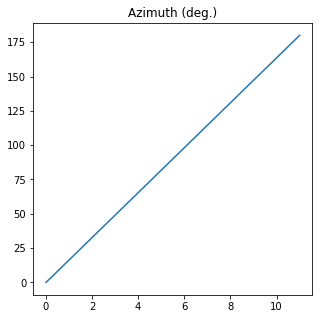

In [28]:
az = np.linspace(0, 179.99*degrees, 12)
E = Jones_vector("Source 1")
E.general_azimuth_ellipticity(azimuth=az)
az = E.parameters.azimuth(draw=True, verbose=True)

The azimuth and ellipticity angles of Source 1 are (deg.):
The mean value of param Azimuth (deg.) is 91.39034179687499 +- 52.24055378247462
The mean value of param Ellipticity angle (deg.) is 3.552713678800501e-15 +- 26.184535918359188


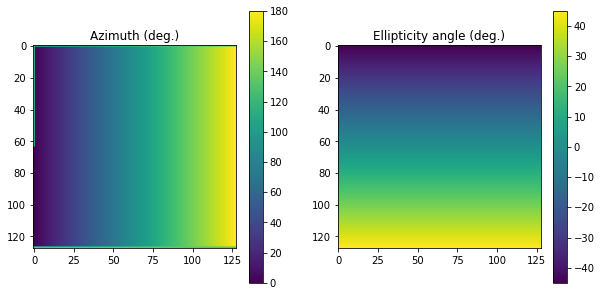

In [29]:
az = np.linspace(0, 179.99*degrees, 128)
el = np.linspace(-45*degrees, 45*degrees, 128)
AZ, EL = np.meshgrid(az, el)

E = Jones_vector("Source 1")
E.general_azimuth_ellipticity(azimuth=AZ, ellipticity=EL)
AZ, EL = E.parameters.azimuth_ellipticity(draw=True)

There is a method in *Parameters_Jones_vector* class, *get_all* that computes all the parameters available and stores in a dictionary *.dict_params()*. Using the *print* function upon the *Parameters_Jones_vector* class invokes the method *get_all*.

Example:

Source 1 = 
[+1.000]   [+0.831]   [+0.383]   [-0.195]   [-0.707]   
[+0.000]   [+0.556]   [+0.924]   [+0.981]   [+0.707]   
 

The elctric field components of Source 1 are (V/m):
  Ex (V/m)
[ 1.        +0.j  0.83146961+0.j  0.38268343+0.j -0.19509032+0.j
 -0.70710678+0.j]
  Ey (V/m)
[0.        +0.j 0.55557023+0.j 0.92387953+0.j 0.98078528+0.j
 0.70710678+0.j]
The mean value of param Ex (V/m) is (0.2623911882929919+0j) +- 0.6374328012998054
The mean value of param Ey (V/m) is (0.6334683654241334+0j) +- 0.3514941224830809


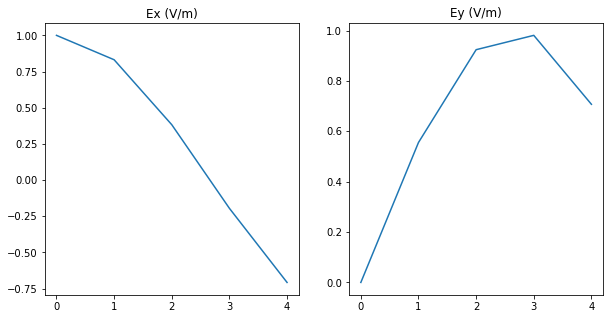


The elctric field amplitudes of Source 1 are (V/m):
  Ex (V/m)
[1.         0.83146961 0.38268343 0.19509032 0.70710678]
  Ey (V/m)
[0.         0.55557023 0.92387953 0.98078528 0.70710678]
The mean value of param Ex (V/m) is 0.6232700295740622 +- 0.294455738781694
The mean value of param Ey (V/m) is 0.6334683654241334 +- 0.3514941224830809


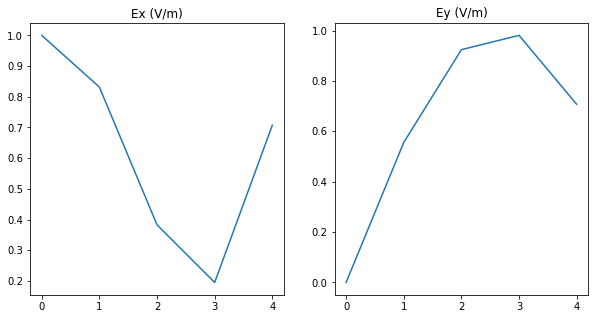


The intensity of Source 1 is (a.u.):
[1. 1. 1. 1. 1.]
The mean value is 1.0 +- 0.0


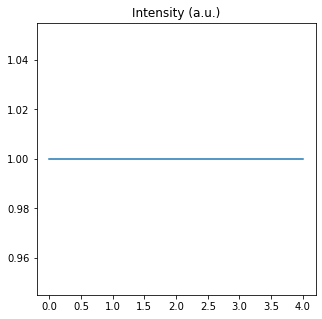


The norm of Source 1 is (a.u.):
[1. 1. 1. 1. 1.]
The mean value is 1.0 +- 0.0


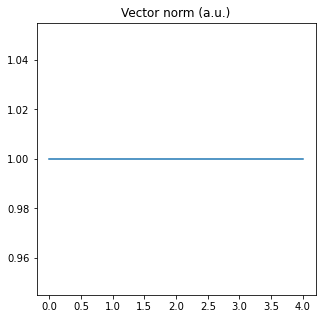


The irradiance of Source 1 is (W/m^2):
[0.00132721 0.00132721 0.00132721 0.00132721 0.00132721]
The mean value is 0.0013272104690361798 +- 0.0


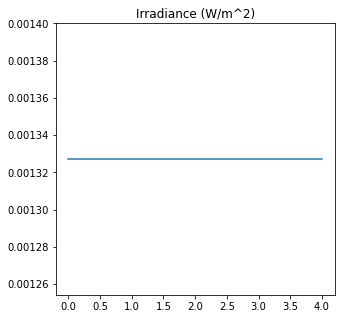


The ratio angle between electric field amplitudes of Source 1 is (deg.):
[ 0.   33.75 67.5  78.75 45.  ]
The mean value is 45.0 +- 27.55675960631076


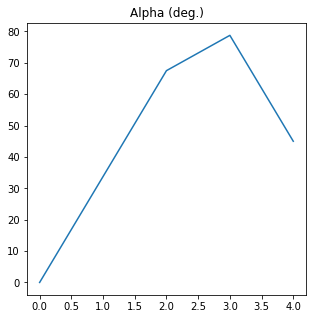


Delay between electric field components of Source 1 is (deg.):
[  0.   0.   0. 180. 180.]
The mean value is 72.0 +- 88.18163074019441


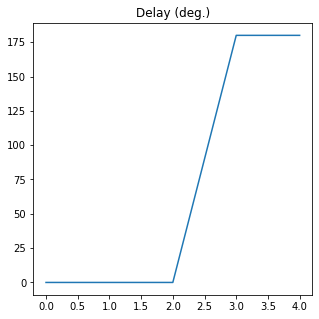


azimuth (5,)
The azimuth of Source 1 is (deg.):
[  0.    33.75  67.5  101.25 135.  ]
The mean value is 67.49999999999999 +- 47.72970773009196


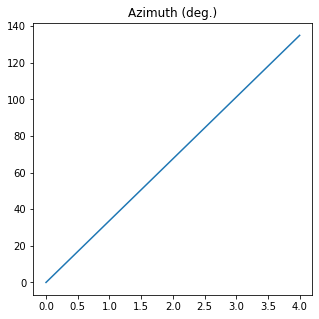


The ellipticity angle of Source 1 is (deg.):
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.34258920e-15
 3.50835465e-15]
The mean value is 9.70188769680624e-16 +- 1.3714785349104249e-15


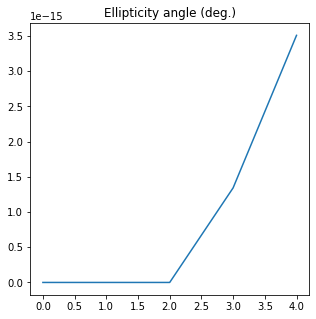


The global phase of Source 1 is (deg.):
[  0.   0.   0. 180. 180.]
The mean value is 72.0 +- 88.18163074019441


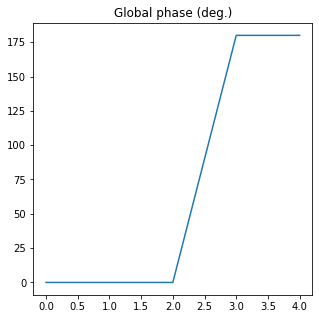


azimuth (5,)
The ellipse axes of Source 1 are (V/m):
  a (V/m)
[1. 1. 1. 1. 1.]
  b (V/m)
[0.0000000e+00 7.4505806e-09 0.0000000e+00 0.0000000e+00 0.0000000e+00]
The mean value of param a (V/m) is 1.0 +- 7.021666937153402e-17
The mean value of param b (V/m) is 1.4901161193847657e-09 +- 2.980232238769532e-09


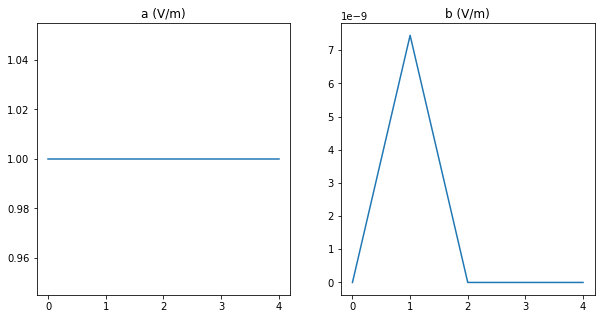


azimuth (5,)
The ellipticity parameter of Source 1 is:
[0.0000000e+00 7.4505806e-09 0.0000000e+00 0.0000000e+00 0.0000000e+00]
The mean value is 1.490116119384766e-09 +- 2.9802322387695322e-09


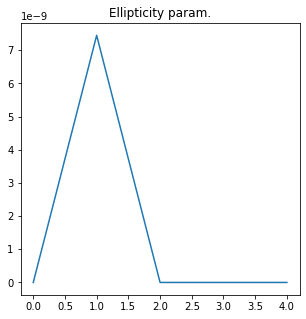


azimuth (5,)
The eccentricity of Source 1 is:
[1. 1. 1. 1. 1.]
The mean value is 1.0 +- 4.965068306494546e-17


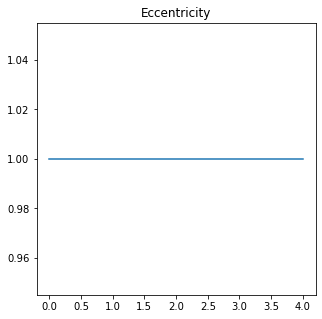


The degree of circular polarization of Source 1 is:
[-0. -0. -0. -0. -0.]
The mean value is 0.0 +- 0.0


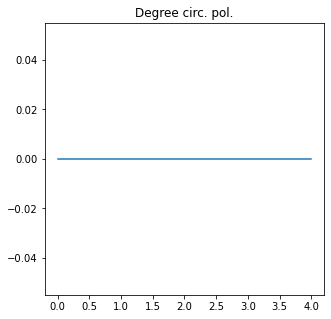


The degree of linear polarization of Source 1 is:
[1. 1. 1. 1. 1.]
The mean value is 1.0 +- 0.0


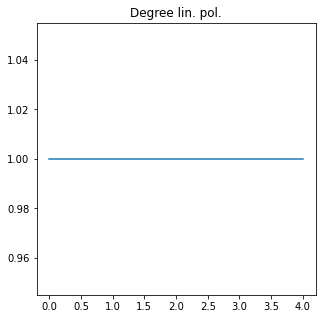

In [30]:
E = Jones_vector("Source 1")
E.linear_light(azimuth = np.linspace(0, 135*degrees, 5))
print(E,'\n')      
print(E.parameters)

## Checks of Jones_vector

There are several checks that can be performed upon a Jones vector. They are implemented in the independent class *Checks_Jones_vector*, which is stored in the *checks* field of *Jones_vector* class.

* **is_linear**: Checks if the Jones vector is lienarly polarized.
* **is_circular**: Checks if the Jones vector is circularly polarized.
* **is_right_handed**: Checks if the Jones vector rotation direction is right handed.
* **is_left_handed**: Checks if the Jones vector rotation direction is left handed.


* **get_all**: Returns a dictionary with all the checks of Jones vector.

For a more detailed description of each method, refer to the individual documentation of each one.

Example:

In [31]:
E = Jones_vector("Source 1")
E.linear_light(azimuth = 45*degrees)
cond = E.checks.is_linear()
print(cond)

True


1D and 2D plot draws are also implemented for this class:

(3249,) (3249,)
Source 1 is right handed:
The mean value is nan +- nan


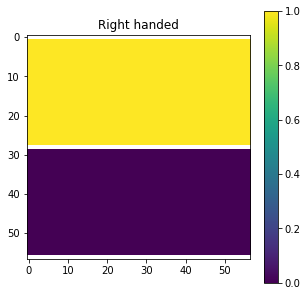

In [32]:
alpha = np.linspace(45*degrees, 45*degrees, 57)
delay = np.linspace(0, 360*degrees, 57)
Alpha, Delay = np.meshgrid(alpha, delay)

E = Jones_vector("Source 1")
E.general_charac_angles(alpha=Alpha, delay=Delay)
_ = E.checks.is_right_handed(draw=True)